In [1]:
import json
import csv

import numpy as np
import pandas as pd

#import seaborn as sns
#print(sns.__version__)
import matplotlib.pyplot as plt

from utils import *
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [10]:
tweet_folder = '/home/n25tran/HBDC/tweetsv0.2/RawTweets/'
outpath = 'data/tweets_nov30_2017.csv'

tweet_folder_json_to_csv(tweet_folder, outpath)

 92%|█████████▏| 1643147/1777619 [03:38<00:17, 7526.95it/s]

Bad json: {"created_at":"Thu Nov 30 17:04:58 +0000 2017","id":936279900788473856,"id_str":"936279900788473856","text":"Confession- I\u2019m terrified \ud83d\ude2c Jumping out of an airplane, being locked \ud83d\udd12 in a room with drug\u2026 https:\/\/t.co\/j2xRY0yHka","source":"\u003ca href=\"http:\/\/instagram.com\" rel=\"nofollow\"\u003eInstagram\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":161072892,"id_str":"161072892","name":"Pamela Barnum","screen_name":"PamelaBarnum","location":"Canada","url":"http:\/\/www.worklesslivemore.ca","description":"Former undercover drug cop and prosecuting attorney serving a sentence as a workaholic. Paroled to inspire others as an author, speaker and confidence expert.","translator_type":"none","protected":false,"verified":false,"followers_count":550,"friends_count":71,"listed_count":14,"favourites

100%|██████████| 728327/728327 [00:20<00:00, 35946.86it/s]


In [29]:
%%time

tweets_df = pd.read_csv('./data/tweets_with_id.csv', encoding='utf8', sep='\t', index_col=0)
#tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'])
#tweets_df.index = tweets_df['created_at']
#regions_df = tweets_df.groupby(['placename']).apply(filter_tweets) # , pd.TimeGrouper('W')
#regions_df.sort_values('num_tweets', ascending=False).head()

<string>:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,13) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 5.2 s, sys: 956 ms, total: 6.16 s
Wall time: 6.16 s


In [44]:
tweets_df.head()

,created_at,lang,retweeted,text,hashtags,full_name,country,created_at.1,favourites_count,followers_count,friends_count,statuses_count,verified,latitude,longitude
_id,,,,,,,,,,,,,,,
5a26f3d2b13879ecbb2efc2e,Mon Oct 30 11:19:41 +0000 2017,en,False,Fed up with people volontarily wasting their l...,[],"Montréal, Québec",Canada,Wed Aug 01 12:05:18 +0000 2007,14255,426.0,423.0,15424.0,False,NaN,NaN
5a26f3d2b13879ecbb2efcb1,Mon Oct 30 11:21:11 +0000 2017,en,False,Who’s more hyped for WW2 more then me? The ans...,[],"Toronto, Ontario",Canada,Thu Dec 22 03:49:12 +0000 2016,16257,1852.0,2821.0,3971.0,False,NaN,NaN
5a26f3d2b13879ecbb2efcd0,Mon Oct 30 11:21:23 +0000 2017,en,False,Someone talk me out of the Barrelman Bike/Run ...,[],"Toronto, Ontario",Canada,Mon May 30 02:43:24 +0000 2011,31067,878.0,1254.0,9702.0,False,NaN,NaN
5a26f3d2b13879ecbb2efcfd,Mon Oct 30 11:21:56 +0000 2017,en,False,Is it really Monday already,[],"Mississauga, Ontario",Canada,Mon Apr 11 18:23:36 +0000 2011,858,165.0,534.0,10008.0,False,NaN,NaN
5a26f3d2b13879ecbb2efd01,Mon Oct 30 11:21:53 +0000 2017,en,False,This is such a great experience! I'd love to l...,[],"Newmarket, Ontario",Canada,Wed May 11 14:08:14 +0000 2016,140,154.0,143.0,214.0,False,NaN,NaN


num_tweets            728327.0
physical_activity      64274.0
sedentary_behavior     36350.0
sleeping               15692.0
dtype: float64


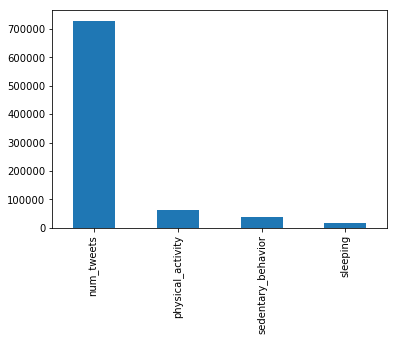

In [203]:
print(regions_df.loc[:, 'num_tweets':].sum())
regions_df.loc[:, 'num_tweets':].sum().plot(kind='bar')

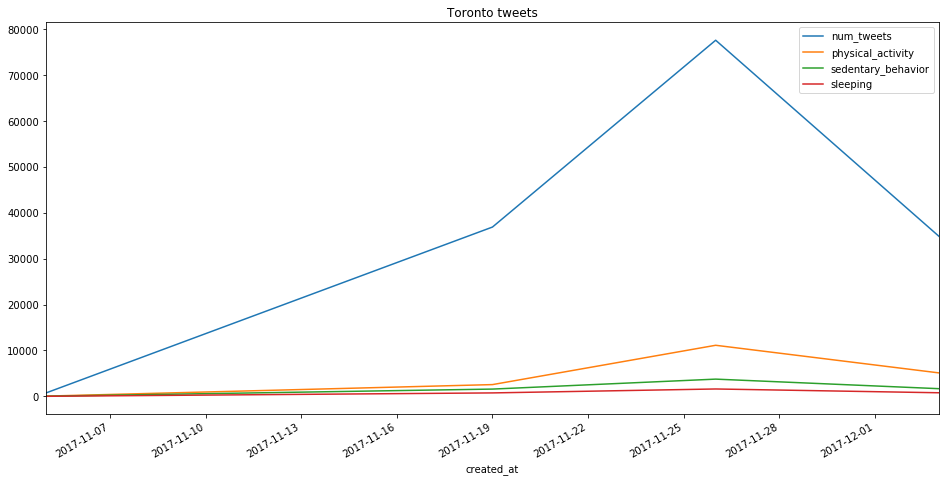

In [66]:
toronto_tweets = regions_df.loc['Toronto, Ontario']

toronto_tweets.plot(y=['num_tweets', 'physical_activity', 'sedentary_behavior', 'sleeping'], figsize=(16, 8), title='Toronto tweets')

In [2]:
tweets_df = pd.read_csv('./data/tweets_nov30_2017.csv')
tweets_df.head()

,created_at,text,screen_name,hashtags,placename,city,province,country,latitude,longitude
0,Sun Nov 26 10:56:23 +0000 2017,b'@DTStJohnsParade postponed for today - see e...,CathyBennettNL,"nlwx,SantaClausParade","St. John's, Newfoundland and Labrador",St. John's,Newfoundland and Labrador,Canada,NaN,NaN
1,Sun Nov 26 10:56:24 +0000 2017,b'Clown prince Rahul Gandhi does not care abou...,atulsubedi,NaN,"Brampton, Ontario",Brampton,Ontario,Canada,NaN,NaN
2,Sun Nov 26 10:56:44 +0000 2017,"b'j\'peux m\\xeame pas avoir le jeu ""Animal Cr...",wxlf_life,NaN,"Vancouver, British Columbia",Vancouver,British Columbia,Canada,NaN,NaN
3,Sun Nov 26 10:56:46 +0000 2017,b'It\\u2019s too cold to stay outside til this...,_bkriiii,NaN,"Toronto, Ontario",Toronto,Ontario,Canada,NaN,NaN
4,Sun Nov 26 10:56:47 +0000 2017,b'Holy shit this guy was my favourite YouTuber...,mickers101,NaN,"Vancouver, British Columbia",Vancouver,British Columbia,Canada,NaN,NaN


In [237]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

activity_verbs = ['play', 'train', 'run\s', 'hike', 'ski\s', 'bike', 'lift']

# Nouns indicate Physical Activity
activity_nouns = [ 'gym', 'workout', 'work out', 'basketball', 'basket ball'
                  ,'hockey', 'biking', 'bb', 'bball', 'baseball', 'climb', 'dance', 'dancin'
                  ,'skate', 'skating', 'squat', 'weights', 'gains', 'volleyball', 'yoga'
                 , 'park', 'mountain'] 

# combine nouns with wikipedia sports
#FIX THE SPACE IN BETWEEN WORDS WITH \(space)
with open('./Tweets_keywords/sportslist.txt') as f:
    lines = f.readlines()

sports = [x.lower().replace('\n', '') for x in lines if x.lower() not in activity_nouns] # removed 3 duplicates

# Exclusion
activity_exclusion = ['look for work', 'hire', 'job', 'career', 'game', 'watch', 'attend']

# stemmed form
activity_verbs_stemmed = [porter.stem(item) for item in activity_verbs]
physical_exclusion_regex = "\s(" + '|'.join(activity_exclusion) + ')'


physical_regex = "\s(" + '|'.join(activity_nouns) + ')'


physical_pattern = r'^(?=.*(?:%s))(?!.*(?:%s))(?=.*%s).*$' % (physical_regex, physical_exclusion_regex, '\\b(play)')

print(physical_pattern)

^(?=.*(?:\s(gym|workout|work out|basketball|basket ball|hockey|biking|bb|bball|baseball|climb|dance|dancin|skate|skating|squat|weights|gains|volleyball|yoga|park|mountain)))(?!.*(?:\s(look for work|hire|job|career|game|watch|attend)))(?=.*\b(play)).*$


In [ ]:
with open('./Tweets_keywords/sportslist.txt') as f:
    lines = f.readlines()

lines = [line.replace('\n', '').lower() for line in lines]
sports = '|\s(' + '|'.join(lines) + ')'

sedentary_pattern = r'\s(working|work|watch|chill|games|movies|nba|ufc|nhl|nfl|cfl|worldseri|play|show)'
sedentary_excl = 'job|hire|career|Job|Hiring|Hire|hiring'
sedentary_pattern = r'^(?=.*(?:%s))(?!.*(?:%s)).*$' % (sedentary_pattern, sedentary_excl)

sleeping_pattern = r'\s(sleep|slept|insomnia|dormir|dodo|rest|nap|zzz|siesta)'
sleeping_excl = 'restaurant'
sleeping_pattern = r'^(?=.*(?:%s))(?!.*(?:%s)).*$' % (sleeping_pattern, sleeping_excl)

physical_incl = '\s(run|hiking|hike|courir|gym|train|workout|work out|basketball \
                    |ball|hockey|biking|bike|bb|bball|baseball|climb|dance|dancin|ran| \
                    skate|skating|squat|lift|gains|volleyball|yoga)'

physical_excl = 'watch|attend'
physical_activity = r'^(?=.*(?:%s))(?!.*(?:%s)).*$' % (physical_incl + sports, physical_excl)

In [46]:
sedentary_pattern

'^(?=.*(?:\\s(black panther)))(?!.*(?:job|hire|career|Job|Hiring|Hire|hiring)).*$'

In [45]:
physical_activity

'^(?=.*(?:\\s(gym|workout|work out|basketball|basket ball|hockey|biking|bball|baseball|climb|dance|dancin|skate|skating|squat|weights|gains|volleyball|yoga|park|mountain)|\\b(play|train|run|hike|ski|bike|lift|play|train|run|hike|ski|bike|lift)))(?!.*(?:\\s(look for work|hire|job|career|watch|attend)))(?=.*).*$'

In [28]:
toronto_tweets = tweets_df.loc[tweets_df.city == 'Montréal']
len(toronto_tweets)

35156

In [5]:
import utils

toronto_tweets = tweets_df.loc[tweets_df.city == 'Toronto']
#toronto_tweets = tweets_df.loc[tweets_df.city == 'Montréal']

sedentary = toronto_tweets.text.str.contains(utils.sedentary_pattern) | toronto_tweets.hashtags.str.contains(utils.sedentary_pattern)
sleeping = toronto_tweets.text.str.contains(utils.sleeping_pattern) | toronto_tweets.hashtags.str.contains(utils.sleeping_pattern)
physical = toronto_tweets.text.str.contains(utils.physical_activity) | toronto_tweets.hashtags.str.contains(utils.physical_activity)

wearable = r'\s(gonike.me)'

nike = toronto_tweets.text.str.contains(wearable)

cond = sedentary | sleeping | physical

/opt/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/opt/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/opt/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/opt/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [42]:
toronto_tweets = tweets_df

sedentary_pattern = r'\s(black panther)'
sedentary_excl = 'job|hire|career|Job|Hiring|Hire|hiring'
sedentary_pattern = r'^(?=.*(?:%s))(?!.*(?:%s)).*$' % (sedentary_pattern, sedentary_excl)
sedentary = toronto_tweets.text.str.contains(sedentary_pattern) | toronto_tweets.hashtags.str.contains(sedentary_pattern)
print("Sedentary:", len(toronto_tweets.loc[sedentary == True]))

/opt/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


Sedentary: 55


In [43]:
toronto_tweets.loc[sedentary].text

_id
5a328f49603fa95bb415152a    With the disney fox movies deal finally done i...
5a32e58b603fa95bb415610e    They should have screening for black people on...
5a542037603fa95bb42e66e0    Shout out to @canuckduke for copping our mothe...
5a579996603fa95bb430feb4    Pink panther and the black panthers. Both movi...
5a5bfd98603fa95bb4349b22    this black panther soundtrack gonna compensate...
5a65721c603fa95bb43bf8e0    @DLind Twitter allows antifa to change peoples...
5a70fac6603fa95bb444e5f9    Already have ideas for academic essays I want ...
5a72b550603fa95bb446e031    I'm pulling up to black panther in the most Af...
5a77b7f8603fa95bb44afa8c    Definitely doing a D-Box black panther showing...
5a7b3deb603fa95bb44dc1d9    @joestando @Leask i’m really angry that my ins...
5a7d1a89603fa95bb44f717c      Who’s coming to see black panther with me ?! 👀🔥
5a7d2ca2603fa95bb44f8162             the black panther soundtrack 🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥
5a81fda1603fa95bb4533065    Can we get a black hippy remix o

In [41]:
toronto_tweets.loc[sedentary == True, ['text', 'hashtags', 'placename']].to_csv('data/tweets_sedentary_april_shows.csv')

In [8]:
with open('./Tweets_keywords/sportslist.txt') as f:
    lines = f.readlines()

lines = [line.replace('\n', '').lower() for line in lines]
sports = '|\s(' + '|'.join(lines) + ')'

sedentary_pattern = r'\s(working|work|watch|chill|games|movies|nba|ufc|nhl|nfl|cfl|worldseri|play|show)'
sedentary_excl = 'job|hire|career|Job|Hiring|Hire|hiring'
sedentary_pattern = r'^(?=.*(?:%s))(?!.*(?:%s)).*$' % (sedentary_pattern, sedentary_excl)

sleeping_pattern = r'\s(sleep|slept|insomnia|dormir|dodo|rest|nap|zzz|siesta)'
sleeping_excl = 'restaurant'
sleeping_pattern = r'^(?=.*(?:%s))(?!.*(?:%s)).*$' % (sleeping_pattern, sleeping_excl)

physical_incl = '\s(run|hiking|hike|courir|gym|train|workout|work out|basketball \
                    |ball|hockey|biking|bike|bb|bball|baseball|climb|dance|dancin|ran| \
                    skate|skating|squat|lift|gains|volleyball|yoga)'

physical_excl = 'watch|attend'
physical_activity = r'^(?=.*(?:%s))(?!.*(?:%s)).*$' % (physical_incl + sports, physical_excl)

#toronto_tweets = tweets_df.loc[tweets_df.country == 'Canada']
toronto_tweets = tweets_df.loc[tweets_df.city == 'Toronto']

#toronto_tweets = tweets_df

sedentary = toronto_tweets.text.str.contains(sedentary_pattern) | toronto_tweets.hashtags.str.contains(sedentary_pattern)
sleeping = toronto_tweets.text.str.contains(sleeping_pattern) | toronto_tweets.hashtags.str.contains(sleeping_pattern)
physical = toronto_tweets.text.str.contains(physical_activity) | toronto_tweets.hashtags.str.contains(physical_activity)

wearable = r'\s(gonike.me)'

nike = toronto_tweets.text.str.contains(wearable)

cond = sedentary | sleeping | physical

print("Total:", len(toronto_tweets))
print("Physical activity:", len(toronto_tweets.loc[physical == True]))
print("Sedentary:", len(toronto_tweets.loc[sedentary == True]))
print("Sleep:", len(toronto_tweets.loc[sleeping == True]))

/opt/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:25: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/opt/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:26: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/opt/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:27: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/opt/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:31: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


Total: 150016
Physical activity: 118208
Sedentary: 6950
Sleep: 952


In [38]:
print("Total:", len(toronto_tweets))
print("Physical activity:", len(toronto_tweets.loc[physical == True]))
print("Sedentary:", len(toronto_tweets.loc[sedentary == True]))
print("Sleep:", len(toronto_tweets.loc[sleeping == True]))

Total: 700729
Physical activity: 23142
Sedentary: 64598
Sleep: 8953


In [7]:
toronto_tweets.loc[sleeping == True]

,created_at,text,screen_name,hashtags,placename,city,province,country,latitude,longitude
9,Sun Nov 26 10:57:54 +0000 2017,b'I let my guard slip and drank tea at dinner ...,rose_tingyi,NaN,"Toronto, Ontario",Toronto,Ontario,Canada,NaN,NaN
46,Wed Nov 29 16:57:39 +0000 2017,b'*New Listing Alert* \\U0001f4cdSpacious one ...,AneetaParmar,NaN,"Toronto, Ontario",Toronto,Ontario,Canada,43.756570,-79.407460
620,Thu Nov 16 12:52:23 +0000 2017,b'Went to bed at 9:15 Tuesday...called in sick...,lisastar08,NaN,"Toronto, Ontario",Toronto,Ontario,Canada,NaN,NaN
731,Wed Nov 22 15:47:02 +0000 2017,"b""Sick &amp; tired of slow network performance...",hutton647,WAN,"Toronto, Ontario",Toronto,Ontario,Canada,43.784169,-79.147910
1503,Wed Nov 15 19:40:06 +0000 2017,"b'Been told I ""look tired"" and ""need a spa day...",MarissaRoberto,NaN,"Toronto, Ontario",Toronto,Ontario,Canada,NaN,NaN
1818,Thu Nov 16 06:42:02 +0000 2017,b'Cant sleep....too much snoring @itsKinosh .....,itsMcCue,"toronto,sleep","Toronto, Ontario",Toronto,Ontario,Canada,NaN,NaN
2729,Sun Nov 26 06:07:36 +0000 2017,"b""to roll one before bed or to not roll one , ...",ariaanexo,NaN,"Toronto, Ontario",Toronto,Ontario,Canada,NaN,NaN
3047,Thu Nov 30 08:33:57 +0000 2017,b'I will never grow tired of watching this htt...,dezzarray,NaN,"Toronto, Ontario",Toronto,Ontario,Canada,NaN,NaN
3513,Wed Nov 22 03:33:00 +0000 2017,"b'Ok, I know you found Jesus, but like, Don\\u...",JenniferJokes,NaN,"Toronto, Ontario",Toronto,Ontario,Canada,NaN,NaN
3536,Wed Nov 22 03:33:20 +0000 2017,"b""When it's soo hard to sleep because of all t...",justineanne_m09,NaN,"Toronto, Ontario",Toronto,Ontario,Canada,NaN,NaN


In [42]:
toronto_tweets.loc[cond == False, ['text', 'hashtags', 'placename']].to_csv('data/tweets_unclassified.csv', index=False)

In [41]:
toronto_tweets.loc[sedentary == True, ['text', 'hashtags', 'placename']].to_csv('data/tweets_sedentary.csv', index=False)

In [10]:
toronto_tweets.loc[sleeping == True, ['created_at', 'text', 'hashtags', 'placename']].to_csv('data/tweets_sleeping_with_time.csv', index=False)

In [39]:
toronto_tweets.loc[physical == True, ['text', 'hashtags', 'placename']].to_csv('data/tweets_physical.csv', index=False)

In [20]:
utils.sleeping_pattern

'^(?=.*(?:\\s(bed|sack|insomnia|dodo|zzz|siesta|tired|nosleep|cantsleep)|\\s(sleep|nap\\s|rest\\s|zzz.?\\s|pass out|get up|wake up|asleep|slept|sleep|nap\\|rest\\|zzz.?\\|pass out|get up|wake up|asleep|slept)))(?!.*(?:\\s(restaurant)))(?=.*).*$'

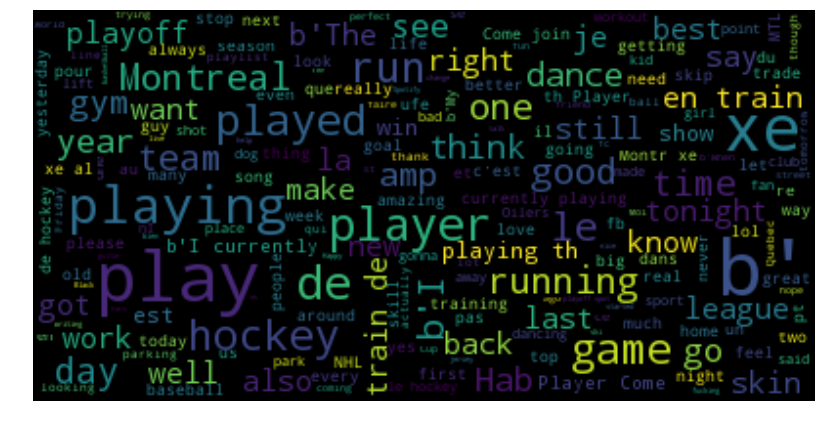

In [31]:
from os import path
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

text = toronto_tweets.loc[physical == True, ['text']].text.as_matrix().tolist()
clean_text = []
for line in text:
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    line = pattern.sub('', line)
    # remove urls
    line = re.sub(r'\http\S+', '', line, flags=re.MULTILINE)
    # remove numbers
    line = re.sub("\d+", " ", line)

    clean_text.append(line)
    
sw = set(STOPWORDS)
sw.add("int")
sw.add("ext")
sw.add("cf")
sw.add("cb")
sw.add("Toronto")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40, stopwords=sw).generate(' '.join(clean_text))
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()

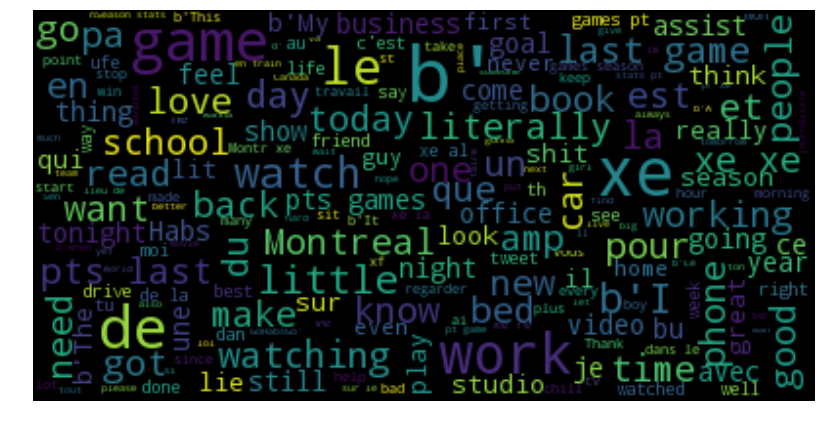

In [32]:
text = toronto_tweets.loc[sedentary == True, ['text']].text.as_matrix().tolist()
clean_text = []
for line in text:
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    line = pattern.sub('', line)
    # remove urls
    line = re.sub(r'\http\S+', '', line, flags=re.MULTILINE)
    # remove numbers
    line = re.sub("\d+", " ", line)

    clean_text.append(line)
    
sw = set(STOPWORDS)
sw.add("int")
sw.add("ext")
sw.add("cf")
sw.add("cb")
sw.add("Toronto")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40, stopwords=sw).generate(' '.join(clean_text))
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

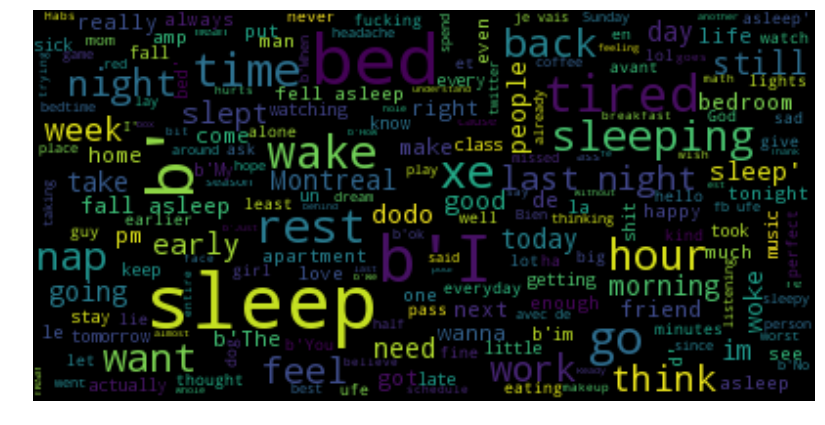

In [33]:
text = toronto_tweets.loc[sleeping == True, ['text']].text.as_matrix().tolist()
clean_text = []
for line in text:
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    line = pattern.sub('', line)
    # remove urls
    line = re.sub(r'\http\S+', '', line, flags=re.MULTILINE)
    # remove numbers
    line = re.sub("\d+", " ", line)

    clean_text.append(line)
    
sw = set(STOPWORDS)
sw.add("int")
sw.add("ext")
sw.add("cf")
sw.add("cb")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40, stopwords=sw).generate(' '.join(clean_text))
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
